# 0. Setup.

In [1]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seeds.
SEED = 42

In [18]:
%%html
<style>
    table {
        float: left;
        margin-right: 20px; /* Optional: Adds space between table and other content */
    }
</style>

# 1. Dataset.

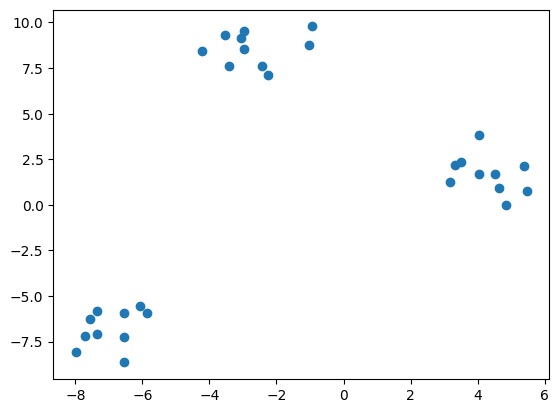

In [2]:
# Create.
from sklearn.datasets import make_blobs
n_samples = 30
x, y      = make_blobs(n_samples=n_samples, random_state=SEED)

# Plot.
plt.scatter(x[:, 0], x[:, 1])

# 2. K-means.

- **Time complexity**: $O(mnk)$, where $k = $ n_clusters.
- **Algorithm**:
  1. Choose `n_clusters`.
  2. Randomly choose `n_clusters` centroids among samples.
  3. For all samples, calculate Euclidean distance and allocate the nearest cluster.
  4. For all clusters, calculate a new centroid.
  5. Repeat step 3~4 until no centroid changes.

> ## Note) Feature Scaling.
> - Features should be scaled properly before using it!  
> - K-means only properly works when the data is sphere-shaped.

## 2.1. Usage.

In [12]:
from sklearn.cluster import KMeans

# Arguments.
model = KMeans(n_clusters   = 8,               # Number of clusters.
               init         = 'k-means++',     # Method for centroids init. ['k-means++', 'random', array-like].
               n_init       = 'auto',          # Num of running with different centroid seeds. 'auto': 10 when `init='random'`, else 1. ['auto', int].
               max_iter     = 300,             # Maximum iteration for a single run.
               tol          = 0.0001,          # Stop iterating if no centroid move greater than this.
               random_state = None,            # Random seed.
               copy_x       = True,            # If `True`, keep the original data intact. If `False`, it does not copy, i.e. can save memory.
               algorithm    = 'lloyd')         # 'lloyd': standard k-means, 'elkan': faster for high dimensional data but requires `n_clusters << n_samples`.

# Methods.
model.fit_predict(X=x)      # Fit and predict.
model.transform(X=x)        # Returns distances from each centroid, for soft clustering.

# Attributes.
model.cluster_centers_      # Get coordinates of each centroid.

array([[0.53433946, 0.858501  ],
       [0.43909738, 0.47019834],
       [0.13565828, 0.23227284],
       [0.73946872, 0.15772075],
       [0.86477643, 0.46345328],
       [0.8302407 , 0.7849394 ],
       [0.15404427, 0.67919642],
       [0.41778883, 0.1409917 ]])

## 2.1. Example.

[]

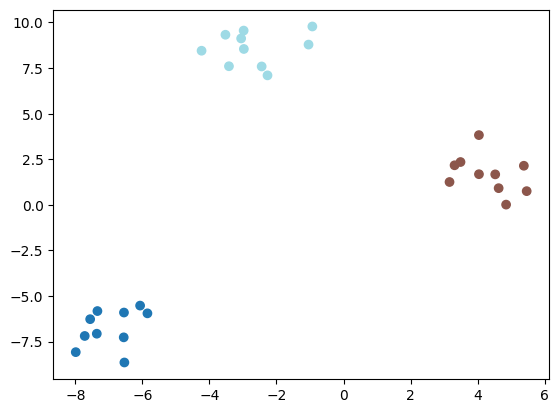

In [4]:
from sklearn.cluster import KMeans

# Set `n_clusters`.
n_clusters   = 3

# Model.
model_kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)

# Perform.
y_pred = model_kmeans.fit_predict(X=x)

# Plot.
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap='tab20')
plt.plot()

## 2.2. Voronoi Diagram.

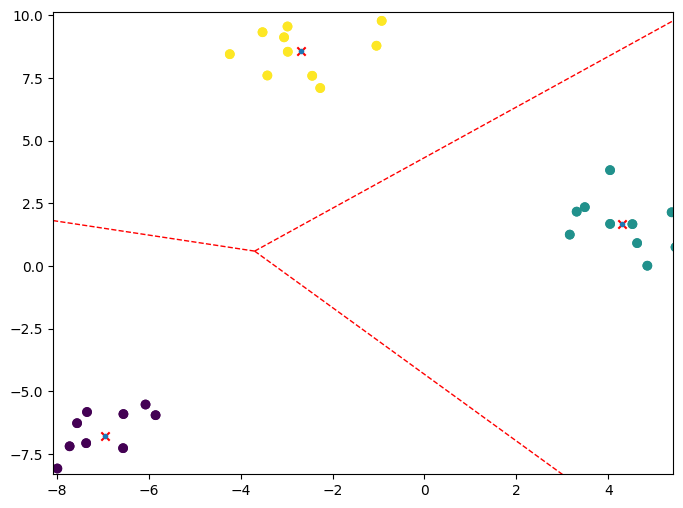

In [5]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# Get predicted centroids.
centroids = model_kmeans.cluster_centers_

# Plot Voronoi diagram.
vor = Voronoi(centroids)

fig, ax = plt.subplots(figsize=(8, 6))

voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='red', line_width=1.0)

ax.scatter(x[:, 0], x[:, 1], c=y_pred, cmap='viridis')
ax.scatter(x[:, 0], x[:, 1], c=y_pred)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')

plt.show()

## 2.3. Centroids Initialization.

### 2.3.1. Manually set.

In [6]:
centroids_init = [
    [2,5],
    [5,2],
    [5,5]
]
model_kmeans_init = KMeans(n_clusters=3, init=centroids_init)

### 2.3.2. K-means++ (default).

1. Randomly choose 1 centroid.
2. For all samples, calculate $\frac{D(x^{(i)})^2}{\sum_{j=1}^{m}D(x^{(j)})^2}$, where $D(\cdot)$ is an Euclidean distance from the closest centroid.
3. Choose the sample with the highest value as the next centroid.
4. Repeat step 2~3 until finding `n_clusters` centroids.

In [7]:
model_kmeans_plus = KMeans(n_clusters=3, init='k-means++')

## 2.4. Choosing `n_clusters`.

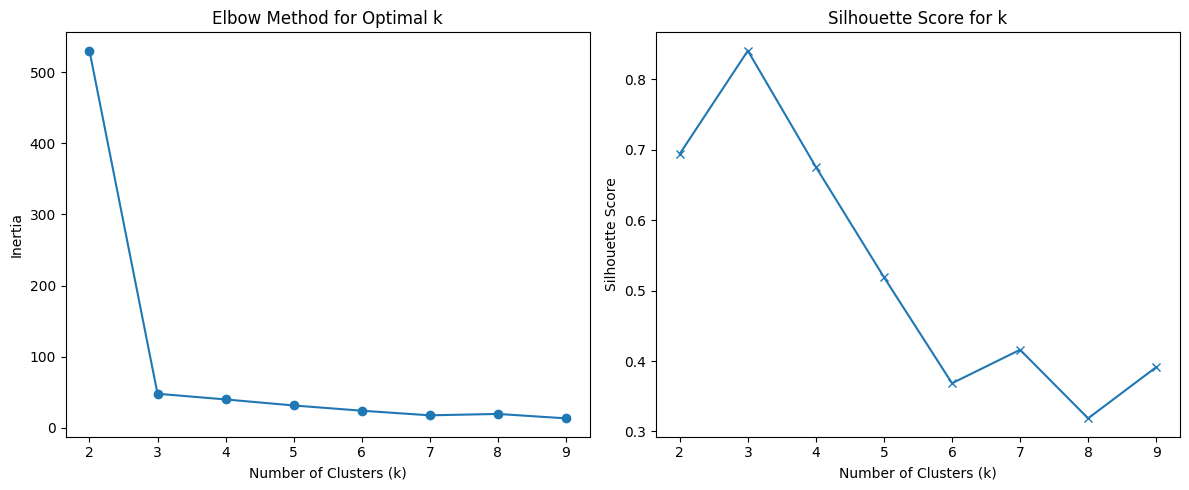

In [8]:
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 10)   # Range to search for `n_clusters`.

inertia_list    = []
silhouette_list = []

for k in n_clusters_range:
    model = KMeans(n_clusters=k, random_state=SEED)
    model.fit(x)  
    inertia_list.append(model.inertia_)  
    silhouette_list.append(silhouette_score(x, model.labels_))      # (b-a)/max(a,b) where a = avg dist in the cluster, b = from the closest cluster.

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(n_clusters_range, inertia_list, marker='o', linestyle='-')
ax[0].set_xlabel("Number of Clusters (k)")
ax[0].set_ylabel("Inertia")
ax[0].set_title("Elbow Method for Optimal k")

ax[1].plot(n_clusters_range, silhouette_list, marker='x', linestyle='-')
ax[1].set_xlabel("Number of Clusters (k)")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score for k")

plt.tight_layout()
plt.show()

## 2.5. Silhouette Diagram.

> Note) If some clusters mostly have smaller values, samples are too close with nearby clusters too.

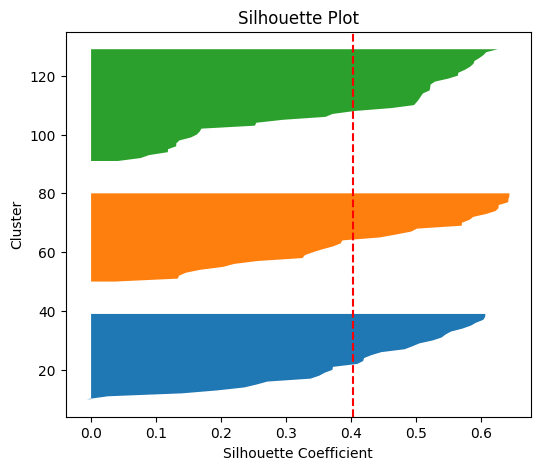

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

x = np.random.rand(100, 2)

k = 3  # Choose the number of clusters
model = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = model.fit_predict(x)
silhouette_vals = silhouette_samples(x, y_pred)   

fig, ax = plt.subplots(figsize=(6, 5))
y_lower = 10
for i in range(k):
    cluster_vals = silhouette_vals[y_pred == i]
    cluster_vals.sort()
    y_upper = y_lower + len(cluster_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals)
    y_lower = y_upper + 10

ax.axvline(silhouette_score(x, y_pred), color="red", linestyle="--")    # Average silhouette score. 
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
ax.set_title("Silhouette Plot")
plt.show()


## 2.6. Soft Clustering.

In [10]:
from scipy.special import softmax

distance = model_kmeans.transform(x).round(2)
pr = softmax(-distance, axis=1).round(3) 

print(distance[:3], '\n')
print(pr[:3])

[[10.25  4.32  8.38]
 [10.49  4.21  8.14]
 [10.44  4.06  8.47]] 

[[0.003 0.98  0.017]
 [0.002 0.979 0.019]
 [0.002 0.986 0.012]]


# 3. DBSCAN.

- Density-based Spatial Clustering of Applications with Noise.
- Can detect arbitral shape of dense area.
- **Time complexity**: $O(m \cdot log(m))$ ~ $O(m^2)$.
- **Algorithm**:
  1. For all samples, calculate a number of **$\epsilon$-neighborhoods**, i.e. samples closer than $\epsilon$.
  2. If the sample has more **$\epsilon$-neighborhoods** than `min_samples`, it becomes a **'Core instance'**.
  3. **Core instance** and its neighborhoods clustered together, and the neighborhoods of the neighborhood, and so on.
  4. Samples neither a core instance nor neighborhood are considered as anomal, i.e. `-1`.

--- 

> ## For Step 1: How to find **$\epsilon$-neighborhoods**.
> - `'auto'`:
>   - Automatically detect the best among below.
> - `'brute'`: **for small datasets.**
>   - Calculate all distances from all pairs.
> - `'ball_tree'`: **for low-dim spatial datasets.**
>   - Calculate a `centroid` of each cluster and its distance from each sample, not distance between samples.
>   - Split a sphere by median, then calculate distance only within the splited sector of sphere.
> - `'kd_tree'`: **for moderate dim spatial datasets.**
>   - Split by median, once per each axis.

---

> | Search Method  | Time Complexity  | Best For  |
> |---------------|-----------------|-----------|
> | **`brute`** | $ O(m^2) $ | Small datasets, high dimensions ($n > 50$) |
> | **`ball_tree`** | $ O(m \log m) $ (construction), $ O(\log m) $ (query) | Low-dimensional data ($ n < 10 $) |
> | **`kd_tree`** | $ O(m \log m) $ (construction), $ O(\log m) $ (query) | Moderate dimensions ($ 10 < n < 50 $) |

## 3.1. Usage.

In [17]:
from sklearn.cluster import DBSCAN

# Arguments.
model = DBSCAN(eps         = 0.1,          # Maximum distance between two samples for them to be considered as neighbors.
               min_samples = 3,            # Minimum number of points to form a dense region.
               metric      = 'euclidean',  # Distance metric. ['euclidean', 'precomputed'], and distances from `sklearn.metrics.pairwise_distances`.
               algorithm   = 'auto',       # 'auto', 'ball_tree', 'kd_tree', or 'brute'.
               leaf_size   = 30,           # Specifies the minimum number of points in a leaf node for tree-based algorithms, i.e. `ball_tree` and `kd_tree`.
               p           = None,         # Minkowski metric power for the `metric` of distance, i.e. k for l_k norm. None defaults to 2 for Euclidean.
               n_jobs      = None)         # Number of parallel jobs (None = 1, -1 = all cores).

# Methods.
y_pred = model.fit_predict(X=x)  # Fit and predict.

# Attributes.
model.core_sample_indices_  # Indices of core points.
model.components_           # Core samples' feature vectors.
model.labels_               # Cluster labels for each sample (-1 = noise).

array([ 0, -1,  0,  1,  2,  0,  3,  8,  0,  3,  3,  4,  4,  5,  3,  5, -1,
        2,  6,  6,  3,  7,  3,  1,  8,  8,  4, -1,  3,  8, -1,  5,  0,  9,
        3, -1,  0, -1,  4,  9,  0,  0,  4, -1,  3,  9,  0,  0,  3,  8,  0,
        0,  0,  9,  0,  1,  2, -1,  6,  5, -1, -1,  8,  1, -1,  1,  8,  7,
        0,  4,  1,  5,  3,  3,  5, -1,  3,  6,  4,  8,  4,  3,  7,  0,  3,
        4,  4, -1,  8, -1,  0,  3,  0,  4,  8,  5,  8,  2, -1,  0],
      dtype=int64)

## 3.2. HDBSCAN.

## 3.3. ST-DBSCAN.

# 4. Agglomerative Clustering.

- Starts with each sample having its own cluster.
- Calculate all pairwise `distance`, and merge with closest one.
- Repeat until all clusters are merged, or there are `n_clusters` clusters.
- **Time complexity**: $O(m^2)$ ~ $O(m^3)$.

---

> ## Arguments.
> | Parameter | Value | Description |
> |-----------|--------|-------------|
> | **`method`** | `'single'` | Uses the **minimum** (closest point) distance between clusters. |
> |  | `'complete'` | Uses the **maximum** (farthest point) distance between clusters. |
> |  | `'average'` | Uses the **mean** distance between all pairs of points in two clusters. |
> |  | `'weighted'` | Similar to `'average'`, but distances are **weighted by cluster size**. |
> |  | `'centroid'` | Uses the **Euclidean distance** between cluster centroids. |
> |  | `'median'` | Uses the **Euclidean distance** between cluster medians. |
> |  | `'ward'` | Minimizes the **variance increase** when merging clusters (default). |
> | **`metric`** | `'euclidean'` | Standard **Euclidean distance**. |
> |  | `'cityblock'` | **Manhattan (L1) distance**, sum of absolute differences. |
> |  | `'minkowski'` | Generalized distance, requires `p` parameter (**L_p norm**). |
> |  | `'cosine'` | **1 - Cosine similarity**, useful for text/vector data. |
> |  | `'correlation'` | **1 - Pearson correlation coefficient**, measures linear relationships. |
> |  | `'hamming'` | **Fraction of differing elements**, used for binary vectors. |
> |  | `'jaccard'` | **1 - Jaccard similarity coefficient**, measures set similarity. |
> |  | `'chebyshev'` | **Maximum absolute coordinate difference** (L-infinity norm). |
> | **`criterion`** | `'inconsistent'` | Uses the inconsistency coefficient to define clusters (default). |
> |  | `'distance'` | Cuts the dendrogram at the threshold `t` based on **linkage distances**. |
> |  | `'maxclust'` | Forms exactly `t` clusters. |
> |  | `'monocrit'` | Uses `monocrit` array values to determine clustering. |
> |  | `'maxclust_monocrit'` | Similar to `'maxclust'` but based on `monocrit`. |



## 4.1. Usage.

In [27]:
# `linkage`: perform clustering.
Z = linkage(x, method='single', metric='euclidean')

# `fcluster`: perform actual fitting and prediction.
clusters = fcluster(Z           = Z,                  # Linkage matrix from `linkage()`, storing hierarchical merges.
                    t           = 1.5,                # Threshold for forming clusters, depends on `criterion`.
                    criterion   = 'distance',         # Defines how clusters are determined (see options below).
                    depth       = 2,                  # Used only if `criterion='inconsistent'`, controls depth.
                    R           = None,               # Inconsistency matrix, required if using `inconsistent`.
                    monocrit    = None)               # Used for `monocrit` or `maxclust_monocrit` criteria.

## 4.2. Example.

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering.
Z = linkage(x, method='ward')

# Assign clusters with appended date information.
y_pred = fcluster(Z, t=1.5, criterion='distance')

# 5. GMM.